#### kyle cassidy - 20204-02-20

## overview

In [1]:
# requirements for notebook
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
import pandas as pd

import sqlite3
conn = sqlite3.connect('backend/app/data/sp500_p1_sm.sqlite')
cursor = conn.cursor()

# table schemas

In [2]:
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cursor.fetchall())

[('sp_500_companies',), ('sqlite_sequence',), ('sp_500_stocks',), ('sp_500_index_levels',)]


# connection to public_companies DB

In [3]:
companies_query = "SELECT * FROM sp_500_companies"
sp_500_comp = pd.read_sql_query(companies_query, conn)
sp_500_comp.head()

,id,exchange,symbol,short_name,long_name,sector,industry,current_price,market_cap,ebitda,revenue_growth,city,state,country,long_business_summary,weight
0,1,NMS,MSFT,Microsoft Corporation,Microsoft Corporation,Technology,Software - Infrastructure,404.06,3.002344e+12,1.184270e+11,0.176,Redmond,WA,United States,Microsoft Corporation develops and supports so...,0.064672
1,2,NMS,AAPL,Apple Inc.,Apple Inc.,Technology,Consumer Electronics,182.31,2.815213e+12,1.301090e+11,0.021,Cupertino,CA,United States,"Apple Inc. designs, manufactures, and markets ...",0.060641
2,3,NMS,NVDA,NVIDIA Corporation,NVIDIA Corporation,Technology,Semiconductors,726.13,1.793541e+12,2.216100e+10,2.055,Santa Clara,CA,United States,"NVIDIA Corporation provides graphics, and comp...",0.038634
3,4,NMS,AMZN,"Amazon.com, Inc.","Amazon.com, Inc.",Consumer Cyclical,Internet Retail,169.51,1.760768e+12,8.551500e+10,0.139,Seattle,WA,United States,"Amazon.com, Inc. engages in the retail sale of...",0.037928
4,5,NMS,GOOGL,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information,140.52,1.754294e+12,1.001720e+11,0.135,Mountain View,CA,United States,Alphabet Inc. offers various products and plat...,0.037788


In [4]:
index_query = "SELECT * FROM sp_500_index_levels;"
sp_500_index = pd.read_sql_query(index_query, conn)
sp_500_comp.head()

,id,exchange,symbol,short_name,long_name,sector,industry,current_price,market_cap,ebitda,revenue_growth,city,state,country,long_business_summary,weight
0,1,NMS,MSFT,Microsoft Corporation,Microsoft Corporation,Technology,Software - Infrastructure,404.06,3.002344e+12,1.184270e+11,0.176,Redmond,WA,United States,Microsoft Corporation develops and supports so...,0.064672
1,2,NMS,AAPL,Apple Inc.,Apple Inc.,Technology,Consumer Electronics,182.31,2.815213e+12,1.301090e+11,0.021,Cupertino,CA,United States,"Apple Inc. designs, manufactures, and markets ...",0.060641
2,3,NMS,NVDA,NVIDIA Corporation,NVIDIA Corporation,Technology,Semiconductors,726.13,1.793541e+12,2.216100e+10,2.055,Santa Clara,CA,United States,"NVIDIA Corporation provides graphics, and comp...",0.038634
3,4,NMS,AMZN,"Amazon.com, Inc.","Amazon.com, Inc.",Consumer Cyclical,Internet Retail,169.51,1.760768e+12,8.551500e+10,0.139,Seattle,WA,United States,"Amazon.com, Inc. engages in the retail sale of...",0.037928
4,5,NMS,GOOGL,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information,140.52,1.754294e+12,1.001720e+11,0.135,Mountain View,CA,United States,Alphabet Inc. offers various products and plat...,0.037788


In [5]:
stocks_query = "SELECT * FROM SP_500_stocks;"
sp_500_stocks = pd.read_sql(stocks_query, conn)
sp_500_stocks.head()

,id,date,symbol,adj_close,close,high,low,open,volume
0,1,2023-01-03,MMM,113.601257,122.470001,122.639999,120.370003,121.519997,2612800.0
1,2,2023-01-04,MMM,116.087181,125.150002,125.290001,122.709999,123.349998,2769700.0
2,3,2023-01-05,MMM,114.055779,122.959999,124.570000,122.459999,124.209999,2606600.0
3,4,2023-01-06,MMM,117.543503,126.720001,127.129997,123.750000,124.660004,2417000.0
4,5,2023-01-09,MMM,117.608421,126.790001,129.460007,126.110001,127.000000,2871300.0


In [10]:
#financial statements have not been adapted to the database yet CSV data:
seed_path="backend/app/data/seed-sp500/sp500_csv/"
balanceSheetHistory_quarterly=pd.read_csv(f"{seed_path}balanceSheetHistory_quarterly.csv")
balanceSheetHistory_annually=pd.read_csv(f"{seed_path}balanceSheetHistory_annually.csv")
incomeStatementHistory_quarterly=pd.read_csv(f"{seed_path}incomeStatementHistory_quarterly.csv")
incomeStatementHistory_annually=pd.read_csv(f"{seed_path}incomeStatementHistory_annually.csv")
cashflowStatement_quarterly=pd.read_csv(f"{seed_path}cashflowStatement_quarterly.csv")
cashflowStatement_annually=pd.read_csv(f"{seed_path}cashflowStatement_annually.csv")
files2={"S&P Companies Data":sp_500_comp, "S&P Index Data": sp_500_index,"S&P Stocks Data":sp_500_stocks}
files={"Balance Sheet Quarterly":balanceSheetHistory_quarterly, "Balance Sheet Annually": balanceSheetHistory_annually,"Income Statement Quarterly":incomeStatementHistory_quarterly, "Income Statement Annually":incomeStatementHistory_annually,"Cashflow Statement Quarterly":cashflowStatement_quarterly, "Cashflow Statement Annually":cashflowStatement_annually}

In [11]:
def information(df):
    
    print(f"\n----------Information about {df}--------------------\n")
    # Dataframes column information
    print(f"Column Data \n {files[df].info()}")
    
    # Dataframes Sample
    print("\n")
    print(f"-----Sample data-----\n{files[df].head(2)}")
    
    # DataFrame Null values
    df_null=round(files[df].isna().sum()/files[df].isna().count()*100,2).sort_values(ascending=False)
    print("\n")
    print(f"Null values are \n{df_null}")
    
    #Drop Null values
    files[df].dropna(inplace=True)    
    

# Analyzing Public Companies

In [12]:
# Changing market_cap and EBITDA to billion values % Weight to percentage
sp_500_comp['market_cap']=round(sp_500_comp['market_cap']/1000000000,2)
sp_500_comp['ebitda']=round(sp_500_comp['ebitda']/1000000000,2)
sp_500_comp['weight']=round(sp_500_comp['weight']*100,2)

## analysis

## Breakdown of Sectors in S&P 500

### technology, industrials, health services, and financial services make up over half of the S&P 500


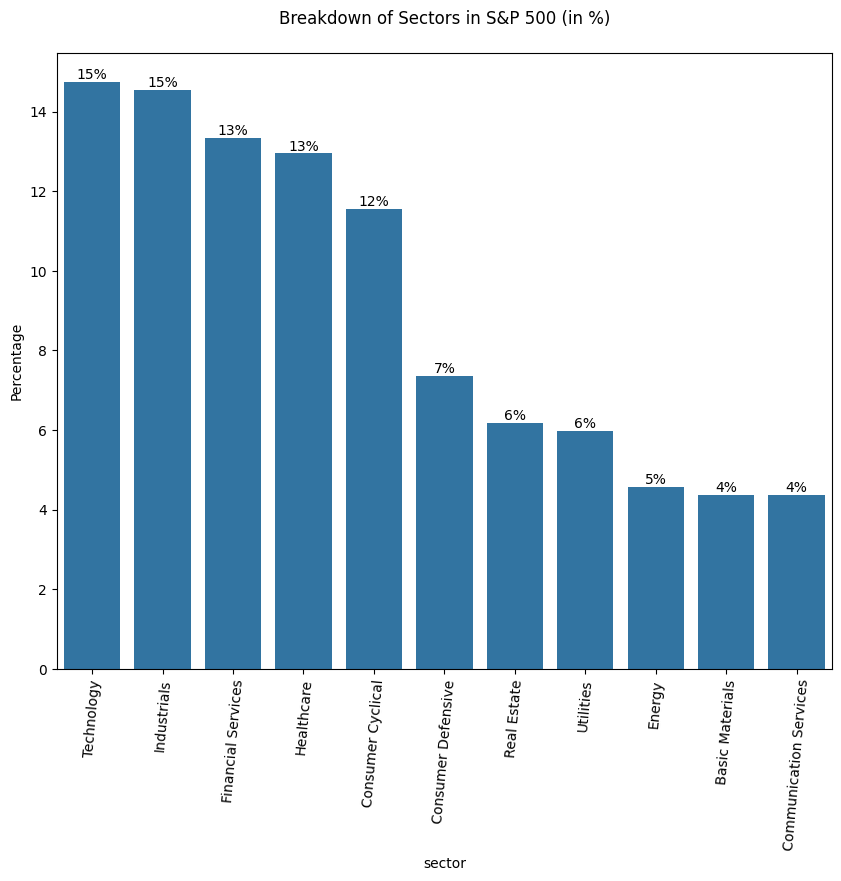

In [13]:

plt.subplots(figsize=(10,8))
sp_sec_brk = sp_500_comp.groupby(by='sector')['symbol'].apply(lambda x: round(x.count() / len(sp_500_comp) * 100, 2)).reset_index().sort_values(by='symbol', ascending=False)
ax = sns.barplot(data=sp_sec_brk, x='sector', y='symbol')
ax.bar_label(ax.containers[0], fmt='%.0f%%')
plt.xticks(rotation=85)
plt.title("Breakdown of Sectors in S&P 500 (in %)\n")
ax.set_ylabel("Percentage")
plt.show()

### techlogy dominates the S&P 500 by market cap

/var/folders/2p/s9rqwyq921lbxt606xjj7fxw0000gn/T/ipykernel_50029/988587484.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sp_500_comp.sort_values(by=est, ascending=False).head(10),y=est,x="symbol", palette=color[est])


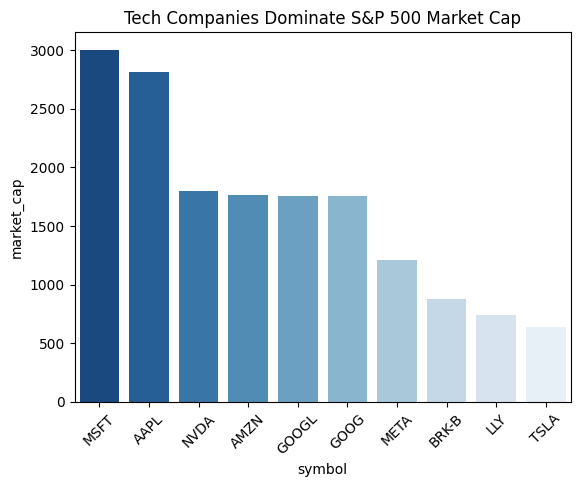

/var/folders/2p/s9rqwyq921lbxt606xjj7fxw0000gn/T/ipykernel_50029/988587484.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sp_500_comp.sort_values(by=est, ascending=False).head(10),y=est,x="symbol", palette=color[est])


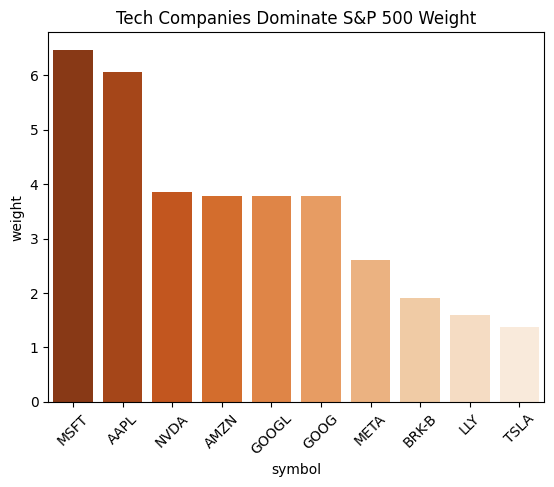

In [14]:
estimators=['market_cap','weight']
color={'market_cap':'Blues_r','weight':'Oranges_r'}
for est in estimators:
    sns.barplot(data=sp_500_comp.sort_values(by=est, ascending=False).head(10),y=est,x="symbol", palette=color[est])
    plt.xticks(rotation=45)
    plt.title("Tech Companies Dominate S&P 500 {}".format(est.replace("_", " ").title()))
    plt.show()
    

#### additional market cap analysis

In [15]:
# Stats on Top Companies by MarketCap
top_comp_mkt_cap = sp_500_comp[['symbol', 'current_price', 'market_cap', 'ebitda', 'revenue_growth', 'weight']].sort_values(by='market_cap', ascending=False).head(10)
top_comp_mkt_cap

,symbol,current_price,market_cap,ebitda,revenue_growth,weight
0,MSFT,404.06,3002.34,118.43,0.176,6.47
1,AAPL,182.31,2815.21,130.11,0.021,6.06
2,NVDA,726.13,1793.54,22.16,2.055,3.86
3,AMZN,169.51,1760.77,85.52,0.139,3.79
4,GOOGL,140.52,1754.29,100.17,0.135,3.78
5,GOOG,141.76,1753.91,100.17,0.135,3.78
6,META,473.32,1206.69,60.18,0.247,2.60
7,BRK-B,405.99,880.00,109.88,0.212,1.90
8,LLY,782.06,742.42,11.84,0.281,1.60
9,TSLA,199.95,636.80,13.56,0.035,1.37


/var/folders/2p/s9rqwyq921lbxt606xjj7fxw0000gn/T/ipykernel_50029/62848320.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x=x_stats[i], y="symbol", data=top_comp_mkt_cap, palette=palette[x_stats[i]])
/var/folders/2p/s9rqwyq921lbxt606xjj7fxw0000gn/T/ipykernel_50029/62848320.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x=x_stats[i], y="symbol", data=top_comp_mkt_cap, palette=palette[x_stats[i]])
/var/folders/2p/s9rqwyq921lbxt606xjj7fxw0000gn/T/ipykernel_50029/62848320.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x=x_

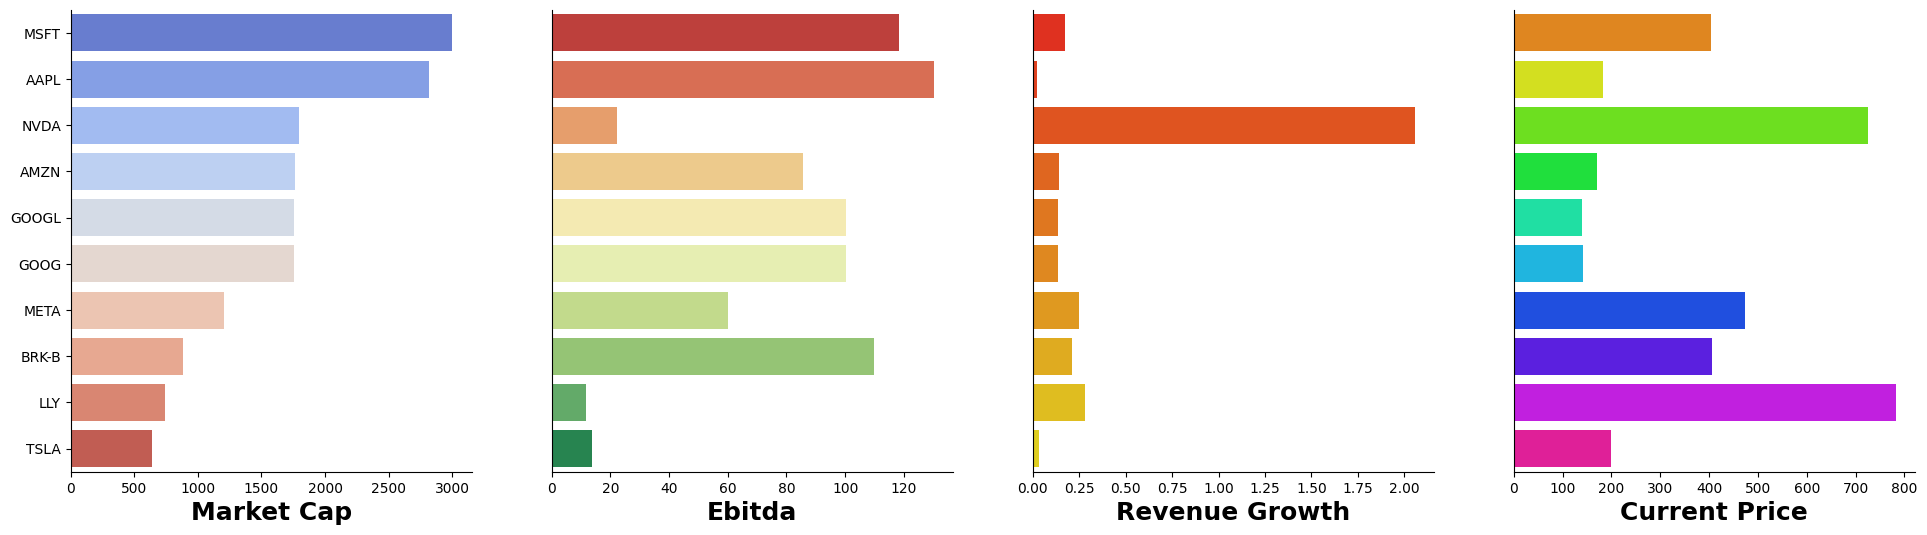

In [16]:
# Map the statistics
fig = plt.figure(figsize=(30, 6), num=None)
x_stats=["market_cap","ebitda","revenue_growth","current_price"]
palette={"market_cap":"coolwarm","ebitda":"RdYlGn","revenue_growth":"autumn","current_price":"hsv"}
for i in range(len(x_stats)):
    ax=plt.subplot(1, 5, i+1)
    ax=sns.barplot(x=x_stats[i], y="symbol", data=top_comp_mkt_cap, palette=palette[x_stats[i]])
    ax.set_xlabel(x_stats[i].replace("_", " ").title(), weight='bold',fontsize=18)
    ax.set_ylabel('')
    if i != 0:
        ax.set_yticks([])
sns.despine()
# plt.tight_layout()



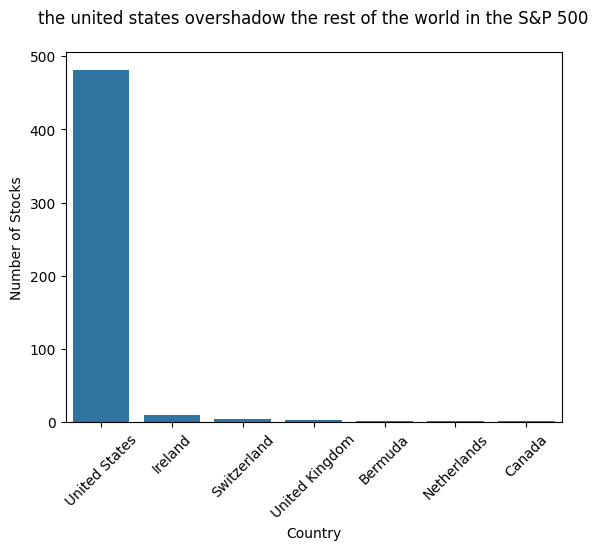

In [17]:
# Plot count of stocks for each country
country_counts = sp_500_comp['country'].value_counts()
sns.barplot(x=country_counts.index, y=country_counts.values)
plt.title('the united states overshadow the rest of the world in the S&P 500\n')
plt.xlabel('Country')
plt.ylabel('Number of Stocks')
plt.xticks(rotation=45)
plt.show()


### size and profitability of a company are closely linked to its weight 
current price and revenue growth are not strongly connected to these factors.

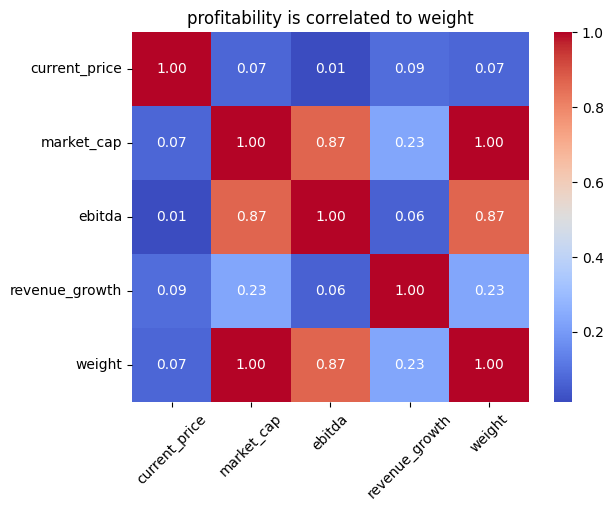

In [18]:
correlation_matrix = sp_500_comp[['current_price', 'market_cap', 'ebitda', 'revenue_growth', 'weight']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('profitability is correlated to weight')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

 The correlation matrix for S&P 500 companies' financial attributes shows:
 
 - **Current Price** has very low positive correlations with all other attributes, indicating its movement is largely independent of the company's market cap, profitability, revenue growth, and weight in the index.
 
 - **Market Cap** has a very strong positive correlation with weight (0.974) and a strong positive correlation with ebitda (0.868), suggesting larger companies tend to have higher earnings and more influence in the index.
 
 - **EBITDA** is strongly correlated with market_cap and weight, but not with current_price or revenue_growth, indicating that profitability is tied to company size and index weight but not to stock price or revenue growth rate.
 
 - **Revenue Growth** shows low to moderate positive correlations with market_cap and weight, hinting that companies with higher revenue growth may have slightly higher market capitalization and index weight.
 
 - **Weight** in the index is very strongly correlated with market_cap and strongly correlated with ebitda, but it has very low correlations with current_price and revenue_growth.



In [19]:
def sp_top_comp(sec, ind, fig, ax, i):
    j = 0
    for indus in ind['industry']:
        top_5_comp = sp_500_comp[sp_500_comp['industry'] == indus].groupby('symbol').agg({'current_price':'mean'}).reset_index().sort_values(by='current_price', ascending=False).head(5)
        ax[i, j].bar(top_5_comp['symbol'], top_5_comp['current_price'])
        ax[i, j].set_title(indus, fontsize=22, weight='bold')
        ax[i, j].tick_params(labelsize=14)  # Adjusted to set labelsize instead of size
        j += 1
    

In [20]:
# top 3 industry in each sector
def sp_top_ind(sec, fig, ax, i):
    top_3_indu = sp_500_comp[sp_500_comp['sector'] == sec].groupby('industry').agg({'current_price':'mean'}).reset_index().sort_values(by='current_price', ascending=False).head(3)
    sp_top_comp(sec, top_3_indu, fig, ax, i)


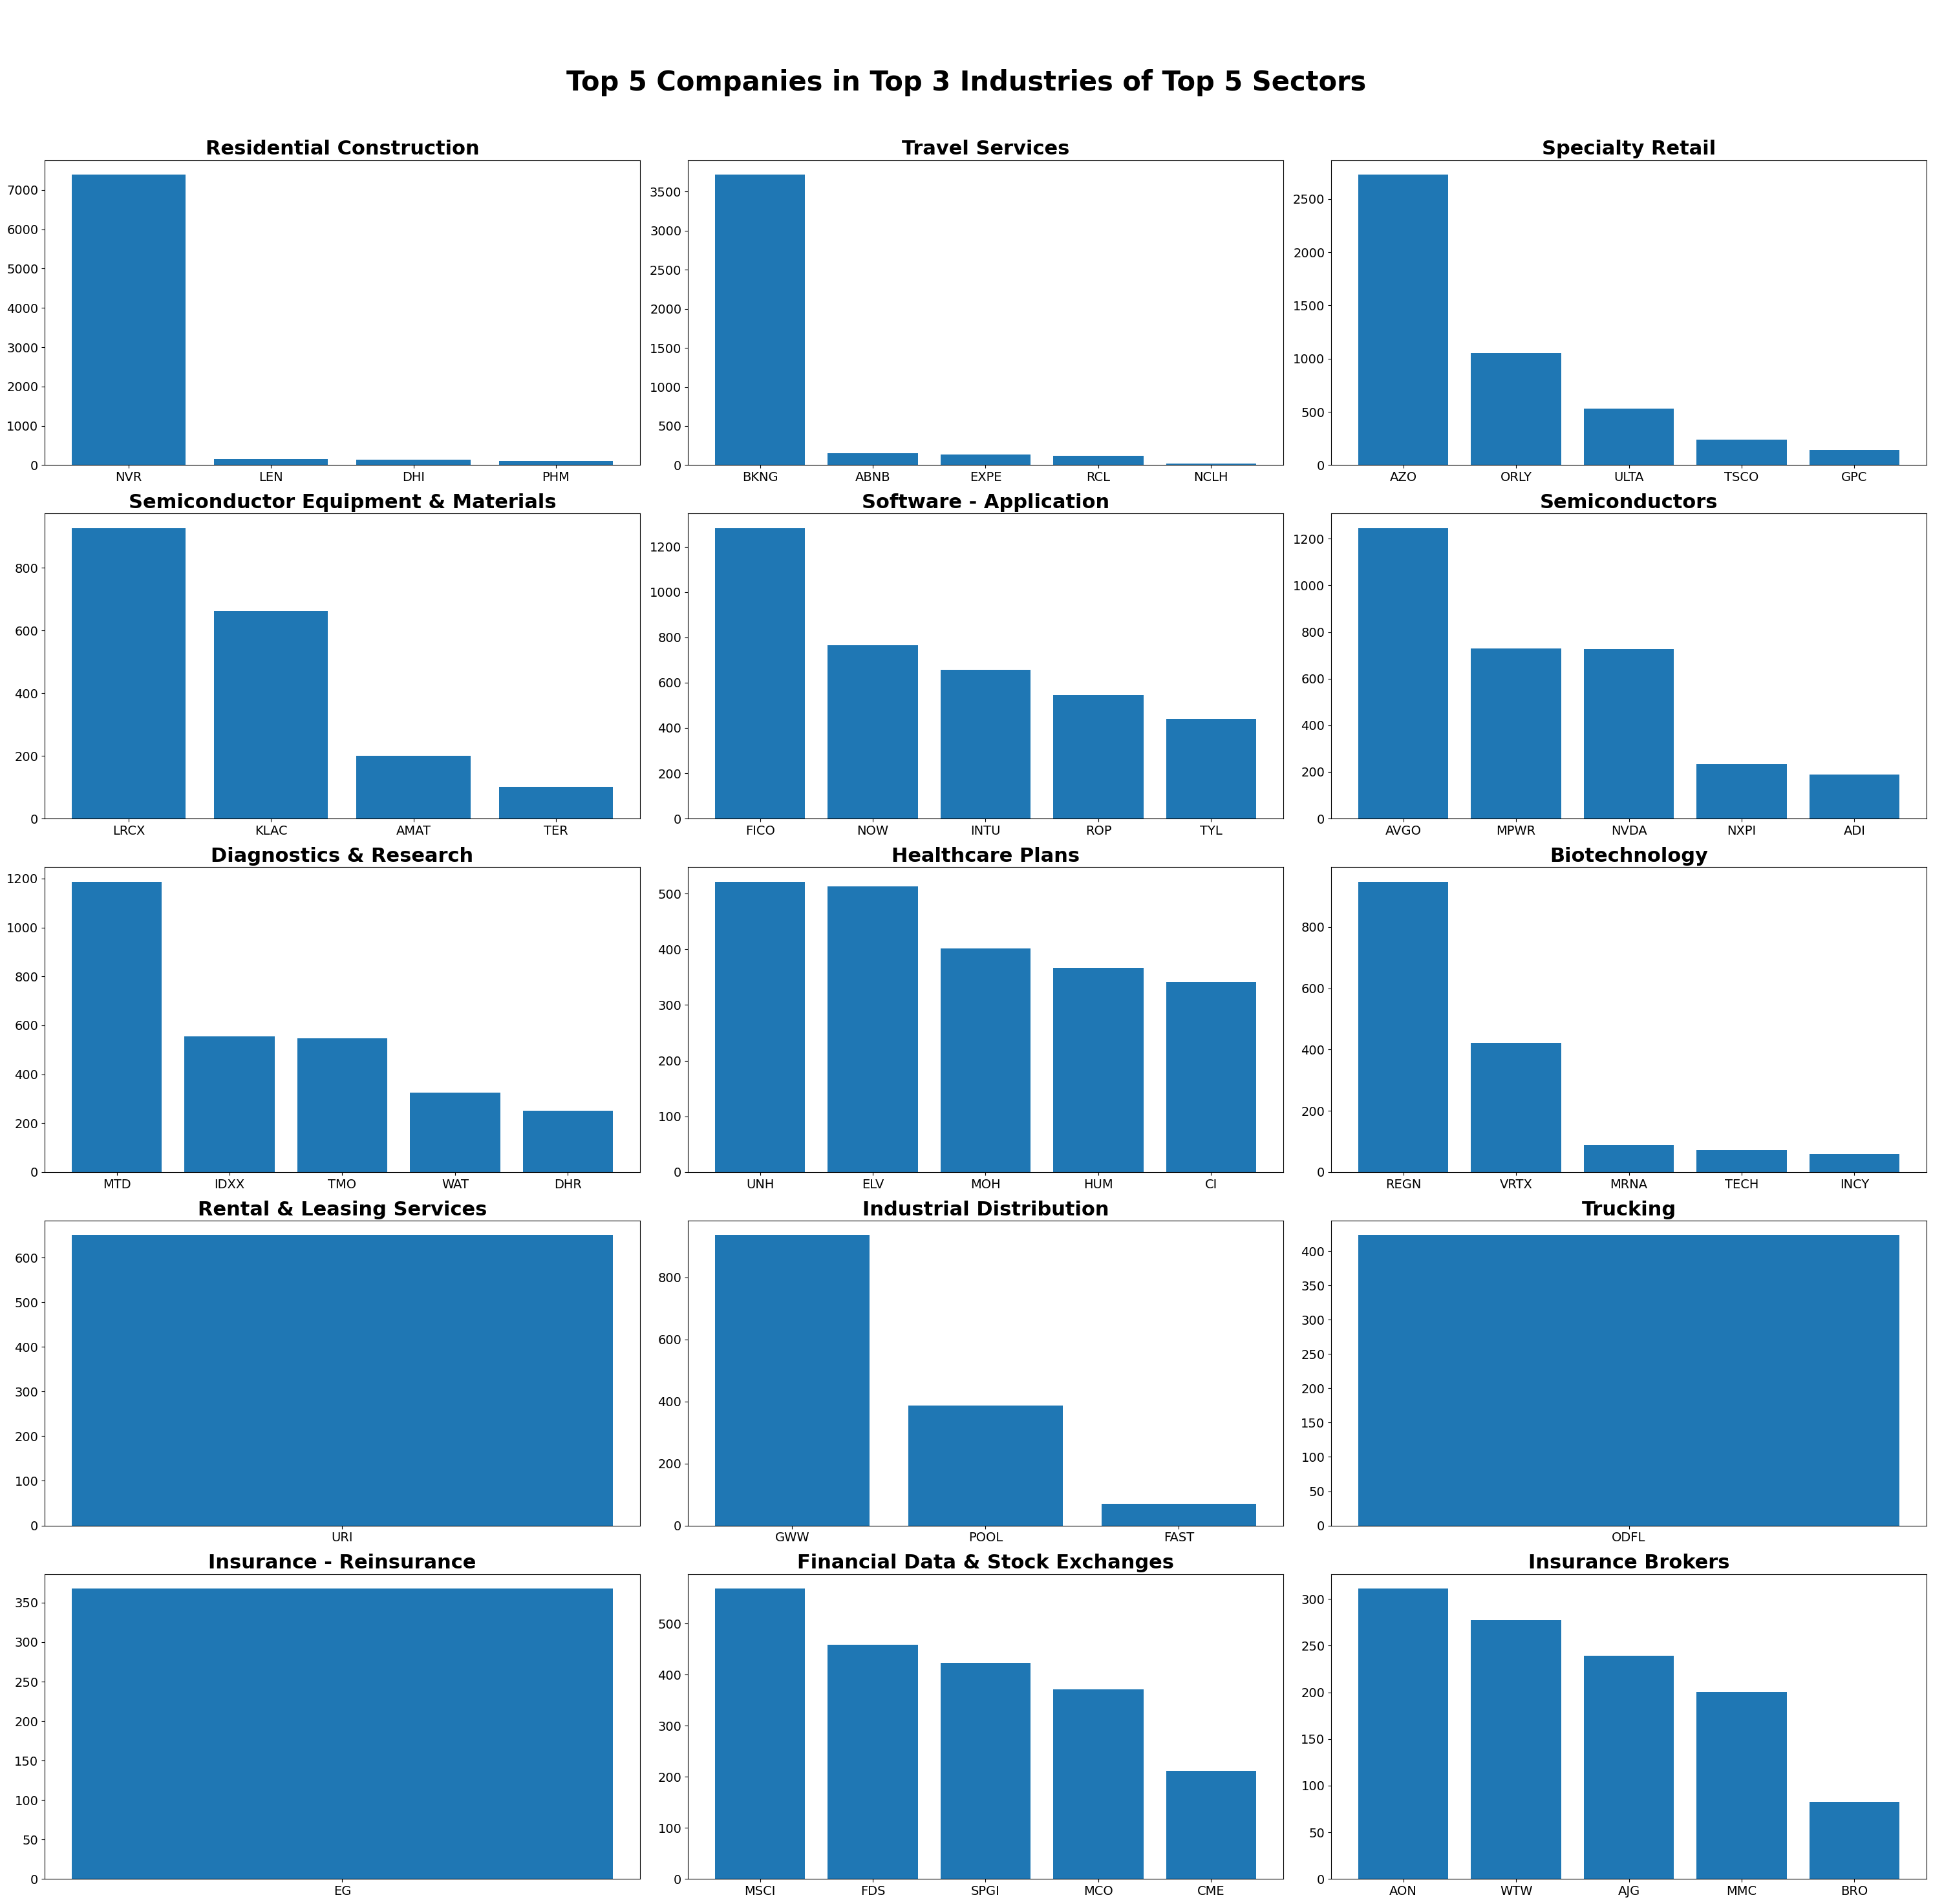

In [21]:
# top 5 sectors
sp_top_sector = sp_500_comp.groupby('sector').agg({'current_price':'mean'}).reset_index().sort_values(by='current_price', ascending=False).head(5)
fig, ax = plt.subplots(5, 3, figsize=(30, 30))
fig.suptitle('\n\nTop 5 Companies in Top 3 Industries of Top 5 Sectors\n\n', fontsize=30, weight='bold')
i = 0
for sec in sp_top_sector['sector']:
    sp_top_ind(sec, fig, ax, i)
    i += 1
fig.tight_layout()


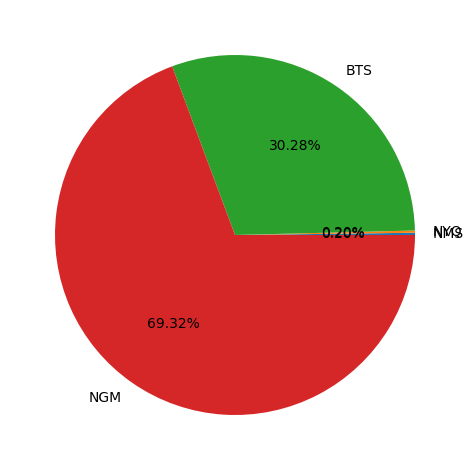

In [22]:
# Number of companies for each exchange
plt.pie(sp_500_comp.groupby(['exchange'])['symbol'].count(), labels=sp_500_comp['exchange'].unique(), autopct='%.2f%%')
plt.tight_layout()
plt.show()